In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
#from TyEIA_key import eia_key
import requests
import scipy.stats as stats
from pprint import pprint

In [3]:
#http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.PRICE.CA-ALL.A
ratesdata = "../DataSets/Rates/StateElectricityProfiles.csv"

rates_df = pd.read_csv(ratesdata)
rates_df.set_index("Name", inplace = True)



In [4]:
rates_df


,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year
Name,,,,,
Alabama,9.18,"32,547","152,878,688","86,182,548",2012
Alaska,16.30,"2,119","6,946,419","6,416,411",2012
Arizona,9.81,"27,587","110,904,994","75,063,343",2012
Arkansas,7.62,"16,355","65,005,678","46,859,567",2012
California,13.50,"71,329","199,518,567","259,538,038",2012
Colorado,9.39,"14,947","52,556,701","53,685,297",2012
Connecticut,15.50,"9,060","36,117,544","29,492,338",2012
Delaware,11.10,"3,357","8,633,694","11,519,331",2012
District of Columbia,11.90,10,"71,787","11,258,845",2012


In [5]:
states = ["IL", "OH", "CA", "AL", "NY", "AZ", "WA", "MA", "FL", "TX"]

rates_df = rates_df.loc[["Illinois","Ohio","California", "Alabama","New York", "Arizona", "Washington", "Massachusetts","Florida","Texas"]]            

rates_df["State"]=rates_df.index

C:\Users\Tyler Locke\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
rates_df['Index'] = range(1, len(rates_df) + 1)
rates_df.set_index("Index", inplace=True)
rates_df.head()
rates_df.to_csv("../DataSets/Rates/StatesAnnualRates.csv")

C:\Users\Tyler Locke\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
states
rates_df.head()

,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year,State
Index,,,,,,
1,8.40,"45,146","197,565,363","143,540,004",2012,Illinois
2,8.30,44950,203004919,141804888,2013,Illinois
3,9.36,44727,202143878,141540287,2014,Illinois
4,9.40,"45,532","193,952,040","138,619,970",2015,Illinois
5,9.38,"44,843","187,441,635","141,050,409",2016,Illinois


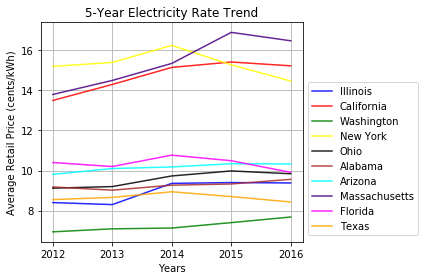

In [8]:
color_map = {"Illinois": "blue",
             "California": "red",
             "Washington": "green",
             "New York": "yellow",
             "Ohio": "black",
            "Alabama": "brown",
            "Arizona": "cyan",
            "Massachusetts": "indigo",
            "Florida": "magenta",
            "Texas": "orange"}

for state in color_map.keys():
    plt.plot(rates_df.loc[rates_df["State"] == state]["Year"], 
                rates_df.loc[rates_df["State"] == state]["Average Retail Price (cents/kWh)"],
                color=color_map[state], alpha=0.85)
plt.legend(labels = color_map, bbox_to_anchor=(1.0, 0.75))
plt.grid()
plt.locator_params(integer=True)
plt.ylabel("Average Retail Price (cents/kWh)")
plt.title("5-Year Electricity Rate Trend")
plt.xlabel("Years")
plt.tight_layout()
plt.savefig("../Output/Averageprice.png")


In [9]:
popdata = "../DataSets/Rates/StatesAnnualRatesPop.csv"

pop_df = pd.read_csv(popdata)

pop_df.head()

,Index,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year,Population,PopMillions,State
0,35,7.68,"30,997","114,086,582","88,885,316",2016,7280934,7.28,Washington
1,34,7.40,"31,003","109,287,458","90,116,086",2015,7073146,7.07,Washington
2,33,7.13,30949,116334363,92140777,2014,7152818,7.15,Washington
3,32,7.09,30656,114172916,92882723,2013,7046931,7.05,Washington
4,31,6.94,"30,910","116,835,474","92,336,441",2012,6963410,6.96,Washington


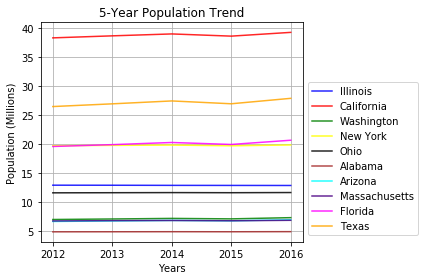

In [10]:
color_map = {"Illinois": "blue",
             "California": "red",
             "Washington": "green",
             "New York": "yellow",
             "Ohio": "black",
            "Alabama": "brown",
            "Arizona": "cyan",
            "Massachusetts": "indigo",
            "Florida": "magenta",
            "Texas": "orange"}

for state in color_map.keys():
    plt.plot(pop_df.loc[pop_df["State"] == state]["Year"], 
                pop_df.loc[pop_df["State"] == state]["PopMillions"],
                color=color_map[state], alpha=0.85)
plt.legend(labels = color_map, bbox_to_anchor=(1.0, 0.75))
plt.grid()
plt.locator_params(integer=True)
plt.ylabel("Population (Millions)")
plt.xlabel("Years")
plt.title("5-Year Population Trend")
plt.tight_layout()
plt.savefig("../Output/PopulationTrend.png")